# Project: Wrangling and Analyze Data: WeRateDogs Twitter Archive

### Introduction
The dataset that I will be using for this project is the @dogrates twitter archive. The project will involve getting additional data such as the image predictions which will be gotten from a website and the data on number of retweets and favorites which will be gotten from the twitter API.
After gathering the data, the data will be assessed, cleaned and then insights will be derived from the cleaned up dataset.

#### Table of contents 
1. Data Gathering
2. Assesing Data
3. Data Cleaning
4. Analyzing and Virtualizing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## Data Gathering
1. The WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) has already been provided by Udacity, hence I will import into the project directly.

In [2]:
ratings_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
ratings_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
import requests
import os

urls = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(urls)

with open(os.path.join(urls.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)  

In [18]:
# Load the image-predictions dataset
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = ratings_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

I was unable to gain access to the Twitter API hence I was unable to download the data programatically.
I will be using the data that has been already been collected by Udacity and which was provided in the project page.

In [169]:
# Load the file tweet-json.txt as a file and read the file line by and finally compile into a dataframe
tweet_array = []

with open('tweet-json.txt', encoding='utf-8') as file:
    for line in file.readlines():
        tweet_line = json.loads(line)
        tweet_array.append({
            'tweet_id' : tweet_line['id'],
            'favorite_count' : tweet_line['favorite_count'],
            'retweet_count' : tweet_line['retweet_count']
        })
        
tweet_df = pd.DataFrame(tweet_array)

In [170]:
tweet_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [31]:
ratings_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
# Review the structure of the dataset
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [114]:
# Check for duplicates in ratings_df 
ratings_df[ratings_df.duplicated()].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [30]:
# Check for Null values in ratings_df
ratings_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [115]:
# Check for duplicates in image_df 
image_df[image_df.duplicated()].shape

(0, 12)

In [69]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [171]:
tweet_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [172]:
# Check the structure of tweet_df 
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [173]:
# Check for duplicates in tweet_df 
tweet_df[tweet_df.duplicated()].shape

(0, 3)

### Quality issues
1. Timestamp data type on the ratings_df is captured as string instead of datetime.

2. The ratings_df contains retweets together with original tweets.

3. Expanded urls column in  ratings_df contains some null values.

4. some of the columns in ratings_df have very little data with too many nulls(in_reply_to_user_id, in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp etc.) Also, a lot of the names in ratings_df is captured as 'None' meaning the names were not captured. These columns will be dropped. 

5. Some of the tweets in the ratings_df does not have images.

6. Some of the ratings are not actual dog ratings.

7. image_df contains some records where the 3 predictions are false.

8. The 3 predictions from the image_df dataframe can be collapsed into one prediction with the highest confidence score for a dog.
9. ratings_df does not have the actual ratings for each dog.

### Tidiness issues
1. The columns for doggo, floofer, pupper and puppo all represent one variable (dog_stage) and should be collapsed into 1 columns.

2. ratings_df, images_df and tweets_df all contain information about 1 observational unit (tweet_id) hence I will merge the 3 dataframes by their tweet_id. 

## Cleaning Data
In this section, I will clean **all** of the issues I documented while assessing the datasets. 

**Quality Issues**

In [480]:
# Make copies of original pieces of data
ratings_clean = ratings_df.copy()
images_clean = image_df.copy()

### Issue #1: Timestamp data type on the ratings_clean dataframe is captured as string instead of date.

#### Define:
Convert the data type for the Timestamp column on ratings_clean dataframe to Datetime

#### Code

In [481]:
ratings_clean['timestamp'] = pd.to_datetime(ratings_clean['timestamp'])

#### Test

In [482]:
ratings_clean['timestamp'].dtype

datetime64[ns, UTC]

### Issue #2:  The ratings_clean dataframe contains retweets together with original tweets.

#### Define
Remove all retweets from the ratings_clean dataset.

#### Code

In [483]:
ratings_clean.drop(ratings_clean[ratings_clean['text'].str.contains('RT @')].index, inplace=True)

#### Test

In [484]:
ratings_clean[ratings_clean['text'].str.contains('RT @')].shape

(0, 17)

### Issue #3: Expanded urls column in ratings_clean dataframe contains some null values.


#### Define
The expanded urls column in the ratings_clean dataframe contains some null values.
I will go ahead and drop the rows containing the null values

#### Code

In [485]:
ratings_clean.drop(ratings_clean[ratings_clean['expanded_urls'].isnull()].index, inplace=True)

#### Test

In [486]:
ratings_clean[ratings_clean['expanded_urls'].isnull()].shape

(0, 17)

### Issue #4: Some of the columns in ratings_clean dataframe have very little data with too many nulls


#### Define
Remove columns that are either completely null or containing very little data and not useful in getting insights from the data. The columns to be deleted are listed below.

1. in_reply_to_status_id         
2. in_reply_to_user_id           
3. retweeted_status_id           
4. retweeted_status_user_id      
5. retweeted_status_timestamp 
6. name                                   


#### Code

In [487]:
cols_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'name']
ratings_clean.drop(cols_to_drop, axis=1, inplace=True)

#### Test

In [488]:
ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   doggo               2117 non-null   object             
 8   floofer             2117 non-null   object             
 9   pupper              2117 non-null   object             
 10  puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 198.5+ KB


### Issue #5: Some of the tweets in the ratings_clean dataframe does not have images.


#### Define
We only want tweets with photos, hence we will extract only tweets that contain photo images

#### Code

In [489]:
ratings_clean = ratings_clean[ratings_clean['expanded_urls'].str.contains('photo') == True]

#### Test

In [490]:
ratings_clean.shape

(1920, 11)

### Issue #6: Some of the tweets in ratings_clean dataframe are not dog ratings.


#### Define
Remove tweets in the ratings_clean dataframe that are not actual dog ratings

#### Code

In [491]:
ratings_clean = ratings_clean[ratings_clean['expanded_urls'].str.startswith('https://twitter.com/dog_rates') == True]

#### Test

In [492]:
ratings_clean.shape

(1892, 11)

### Issue #7: images_clean contains some records where the 3 predictions are false.


#### Define
The images_clean dataframe contains records where all 3 predictions are false and should be removed since the predictions are not dog predictions.

#### Code

In [493]:
images_clean.shape

(2075, 12)

In [494]:
images_clean.drop(image_df[(image_df['p1_dog'] == False) & (image_df['p2_dog'] == False) & (image_df['p3_dog'] == False)].index, inplace=True)

#### Test

In [495]:
images_clean.shape

(1751, 12)

### Issue #8: The 3 predictions from the image_df dataframe can be collapsed into one prediction with the highest confidence score for a dog.


#### Define
There are 3 different predictions with different ratings which can be consolidted into one column representing the best dog match

#### Code

In [496]:
predict = []
conf = 0
dog = ''
pred = ''
tweet_id = 0
jpg_url = ''
img_num = 0

for index in images_clean.index:
    if (images_clean['p1_conf'][index] > images_clean['p2_conf'][index]) & images_clean['p1_dog'][index] == True:
        if images_clean['p1_conf'][index] > images_clean['p3_conf'][index]:
            tweet_id = images_clean['tweet_id'][index]
            jpg_url = images_clean['jpg_url'][index]
            img_num = images_clean['img_num'][index]
            conf = images_clean['p1_conf'][index]
            dog = images_clean['p1_dog'][index]
            pred = images_clean['p1'][index]
        else:
            tweet_id = images_clean['tweet_id'][index]
            jpg_url = images_clean['jpg_url'][index]
            img_num = images_clean['img_num'][index]
            conf = images_clean['p3_conf'][index]
            dog = images_clean['p3_dog'][index]
            pred = images_clean['p3'][index]
        
    elif (images_clean['p2_conf'][index] > images_clean['p3_conf'][index]) & images_clean['p2_dog'][index] == True:
        tweet_id = images_clean['tweet_id'][index]
        jpg_url = images_clean['jpg_url'][index]
        img_num = images_clean['img_num'][index]
        conf = images_clean['p2_conf'][index]
        dog = images_clean['p2_dog'][index]
        pred = images_clean['p2'][index]
    else:
        tweet_id = images_clean['tweet_id'][index]
        jpg_url = images_clean['jpg_url'][index]
        img_num = images_clean['img_num'][index]
        conf = images_clean['p3_conf'][index]
        dog = images_clean['p3_dog'][index]
        pred = images_clean['p3'][index]
            
    predict.append({
        'tweet_id' : tweet_id,
        'jpg_url' : jpg_url,
        'img_num' : img_num,
        'prediction' : pred,
        'is_dog' : dog,
        'confidence_score' : conf
})

#### Test

In [497]:
images_clean = pd.DataFrame(predict)

In [498]:
# Review the new dataframe with predictions collapsed.
images_clean.head()

,tweet_id,jpg_url,img_num,prediction,is_dog,confidence_score
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True,0.560311


In [499]:
# Confirm that all the predictions are for actual dog breeds
images_clean.is_dog.value_counts()

True    1751
Name: is_dog, dtype: int64

### Issue 9 : ratings_df does not have the actual ratings for each dog.

#### Define
Create the ratings column with the actual dog ratings in ratings_df

#### Code

In [500]:
ratings_clean['dog_rating'] = ratings_clean['rating_numerator'] / ratings_clean['rating_denominator']

#### Test

In [501]:
ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1892 non-null   int64              
 1   timestamp           1892 non-null   datetime64[ns, UTC]
 2   source              1892 non-null   object             
 3   text                1892 non-null   object             
 4   expanded_urls       1892 non-null   object             
 5   rating_numerator    1892 non-null   int64              
 6   rating_denominator  1892 non-null   int64              
 7   doggo               1892 non-null   object             
 8   floofer             1892 non-null   object             
 9   pupper              1892 non-null   object             
 10  puppo               1892 non-null   object             
 11  dog_rating          1892 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

### Tidyness Issues

### Issue 1 : The columns for doggo, floofer, pupper and puppo all represent one variable (dog_stage) and should be collapsed into 1 columns.

#### Define
The columns for doggo, floofer, pupper and puppo contains a lot of 'None' values which will be replaced with the value 'Unknown'.

Create a dog_stage column and collapse the columns for doggo, floofer, pupper and puppo into it.

#### Code

In [502]:
# replace all values of "None" with empty strings.

ratings_clean.doggo.replace('None', 'Unknown', inplace=True)
ratings_clean.floofer.replace('None', 'Unknown', inplace=True)
ratings_clean.pupper.replace('None', 'Unknown', inplace=True)
ratings_clean.puppo.replace('None', 'Unknown', inplace=True)

In [503]:
# Create the dog_stage column and collapse the 4 dog stage columns into it.
ratings_clean['dog_stage'] = ratings_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [504]:
# Drop the columns for doggo, floofer, pupper and puppo.
ratings_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [505]:
ratings_clean.dog_stage.value_counts()

Unknown    1611
pupper      201
doggo        52
puppo        21
floofer       7
Name: dog_stage, dtype: int64

### Issue 2 : ratings_df, images_df and tweets_df all contain information about 1 observational unit (tweet_id) hence I will merge the 3 dataframes by their tweet_id

#### Define
1. The images_clean dataframe will be merged with the ratings_clean dataframe based on their tweet_id's.
2. The tweets_df dataframe will be merged with the ratings_clean dataframe based on their tweet_id's.

#### Code

In [506]:
ratings_clean = ratings_clean.merge(images_clean, how='inner', on='tweet_id')
ratings_clean = ratings_clean.merge(tweet_df, how='inner', on='tweet_id')

#### Test

In [507]:
ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605 entries, 0 to 1604
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1605 non-null   int64              
 1   timestamp           1605 non-null   datetime64[ns, UTC]
 2   source              1605 non-null   object             
 3   text                1605 non-null   object             
 4   expanded_urls       1605 non-null   object             
 5   rating_numerator    1605 non-null   int64              
 6   rating_denominator  1605 non-null   int64              
 7   dog_rating          1605 non-null   float64            
 8   dog_stage           1605 non-null   object             
 9   jpg_url             1605 non-null   object             
 10  img_num             1605 non-null   int64              
 11  prediction          1605 non-null   object             
 12  is_dog              1605 non-null 

In [508]:
ratings_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_rating,dog_stage,jpg_url,img_num,prediction,is_dog,confidence_score,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,1.3,Unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,True,0.323581,33819,6514
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,1.2,Unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,True,0.716012,25461,4328
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,1.3,Unknown,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,True,0.168086,42908,8964
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,1.2,Unknown,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,True,0.555712,41048,9774
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,1.3,Unknown,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,True,0.425595,20562,3261


In [509]:
ratings_clean.shape

(1605, 16)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [510]:
ratings_clean.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, I will analyze and visualize the wrangled data. I will be revealing at least **three (3) insights and one (1) visualization.** from the dataset.

In [511]:
# Load the clean dataset "twitter_archive_master"
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [512]:
# Review a few records from the new dataset 
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_rating,dog_stage,jpg_url,img_num,prediction,is_dog,confidence_score,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,1.3,Unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,True,0.323581,33819,6514
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,1.2,Unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,True,0.716012,25461,4328
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,1.3,Unknown,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,True,0.168086,42908,8964
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,1.2,Unknown,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,True,0.555712,41048,9774
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,1.3,Unknown,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,True,0.425595,20562,3261


In [513]:
# Review the structure of the new dataset.
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1605 non-null   int64  
 1   timestamp           1605 non-null   object 
 2   source              1605 non-null   object 
 3   text                1605 non-null   object 
 4   expanded_urls       1605 non-null   object 
 5   rating_numerator    1605 non-null   int64  
 6   rating_denominator  1605 non-null   int64  
 7   dog_rating          1605 non-null   float64
 8   dog_stage           1605 non-null   object 
 9   jpg_url             1605 non-null   object 
 10  img_num             1605 non-null   int64  
 11  prediction          1605 non-null   object 
 12  is_dog              1605 non-null   bool   
 13  confidence_score    1605 non-null   float64
 14  favorite_count      1605 non-null   int64  
 15  retweet_count       1605 non-null   int64  
dtypes: boo

#### Explore the dataset to find the most popular dog breed.

In [514]:
# Count the number of predictions for each dog type to know the most popular dog breed.
twitter_archive_master.prediction.value_counts()

golden_retriever           152
Labrador_retriever         101
Pembroke                    93
Chihuahua                   86
pug                         62
                          ... 
Scotch_terrier               1
Appenzeller                  1
clumber                      1
wire-haired_fox_terrier      1
Irish_wolfhound              1
Name: prediction, Length: 112, dtype: int64

#### Explore the dataset to find the dog breed with the most retweets.

In [515]:
# Using Groupby, determine the top 5 dog breeds with the most retweets.
most_retweets = twitter_archive_master.groupby('prediction').sum().sort_values(by='retweet_count', ascending=False).head(5)
most_retweets.retweet_count

prediction
golden_retriever      535695.0
Labrador_retriever    304649.0
Pembroke              286562.0
Chihuahua             190780.0
Samoyed               161372.0
Name: retweet_count, dtype: float64

#### Explore the dataset to find the dog breed with the most favorites / likes.

In [516]:
# Using Groupby, determine the top 5 dog breeds with the most favorites.
most_favs = twitter_archive_master.groupby('prediction').sum().sort_values(by='favorite_count', ascending=False).head(5)
most_favs.favorite_count

prediction
golden_retriever      1835612.0
Labrador_retriever    1087342.0
Pembroke              1014280.0
Chihuahua              626275.0
French_bulldog         561976.0
Name: favorite_count, dtype: float64

#### Find the dog breed with the highest rating from the dataset.

In [517]:
# Using Groupby, determine the top 5 dog breeds with the highest ratings.
best_rating = twitter_archive_master.groupby('prediction').sum().sort_values(by='dog_rating', ascending=False).head(5)
best_rating

,tweet_id,rating_numerator,rating_denominator,dog_rating,img_num,is_dog,confidence_score,favorite_count,retweet_count
prediction,,,,,,,,,
golden_retriever,1.149808e+20,1968.0,1721.0,174.718182,195.0,152,98.703592,1835612.0,535695.0
Labrador_retriever,7.564031e+19,1234.0,1110.0,112.400000,120.0,101,59.856985,1087342.0,304649.0
Pembroke,6.999821e+19,1057.0,930.0,105.700000,114.0,93,63.115049,1014280.0,286562.0
Chihuahua,6.186880e+19,901.0,861.0,90.036364,107.0,86,45.199927,626275.0,190780.0
pug,4.449408e+19,635.0,620.0,63.500000,77.0,62,41.406287,383817.0,118682.0


#### Check for factors that influence the number of favorites and retweets a tweet gets.

In [518]:
# Using correlation coefficents, I will try to determine the factors that influence which dog tweets are favorited or retweeted.
twitter_archive_master.corr()

,tweet_id,rating_numerator,rating_denominator,dog_rating,img_num,is_dog,confidence_score,favorite_count,retweet_count
tweet_id,1.000000,0.096602,-0.037236,0.390438,0.205324,NaN,0.119611,0.710498,0.496335
rating_numerator,0.096602,1.000000,0.938216,0.343640,0.045755,NaN,0.032952,0.078193,0.062299
rating_denominator,-0.037236,0.938216,1.000000,0.004577,0.002681,NaN,-0.006221,-0.033238,-0.028796
dog_rating,0.390438,0.343640,0.004577,1.000000,0.126161,NaN,0.115919,0.323552,0.264377
img_num,0.205324,0.045755,0.002681,0.126161,1.000000,NaN,0.137690,0.158028,0.153694
is_dog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
confidence_score,0.119611,0.032952,-0.006221,0.115919,0.137690,NaN,1.000000,0.095369,0.069109
favorite_count,0.710498,0.078193,-0.033238,0.323552,0.158028,NaN,0.095369,1.000000,0.925975
retweet_count,0.496335,0.062299,-0.028796,0.264377,0.153694,NaN,0.069109,0.925975,1.000000


### Insights:
1. Based on the prediction results, the Golden retriever is the most popular dog breed tweeted about. 

2. Golden Retriever is also the most retweeted and favorited dog breed.

3. The top 3 rated dog breeds are (1. Golden retriever, 2. Labrador retriever, and 3. Pembroke).
4. The tweet_id influences the number of favorites the tweet receives on twitter. 
5. The favorite count has a positive correlation with the retweet_count.

From the analysis we could see that the Golden retriever dog breed received the highest number of retweets and was also the top rated breed.<br>
Further analysis revealed that the number of likes/favorites receivd by tweets was linked to the specific tweet ID. Also, Tweets that received a lot of favorites were also retweeted more.

From the insights gotten from the analysis of the data, it can be concluded that tweets relating to the Golden retriever dog breed and any of the other top 5 dog breeds is very likely to receive a lot of favorites and retweets as well as high ratings.<br> This indicates that the Golden retriever dog breed is well loved by people.

### Visualization

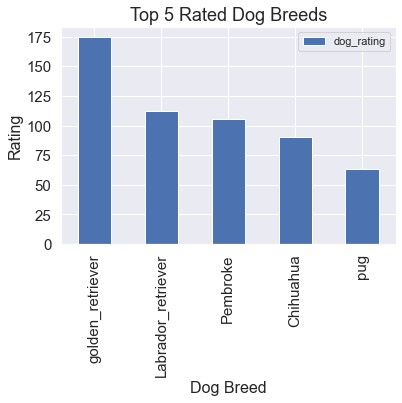

In [519]:
# Plot a bar chart showing the top 5 rated dog breeds.
best_rating.dog_rating.plot.bar(figsize=(6, 4), fontsize=15)
plt.legend()
plt.title('Top 5 Rated Dog Breeds',fontsize = 18)
plt.xlabel('Dog Breed',fontsize = 16)
plt.ylabel('Rating',fontsize = 16);

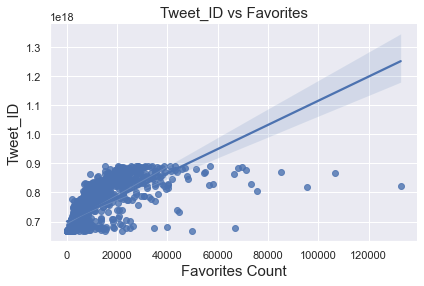

In [520]:
# Plot a scatter plot showing the relationship between tweet_id and favorite_count.
sns.set(font_scale=1.0)
sns.lmplot(y='tweet_id', x='favorite_count', data= twitter_archive_master, height=4, aspect=1.5)

plt.title('Tweet_ID vs Favorites',fontsize = 15)
plt.xlabel('Favorites Count',fontsize = 15)
plt.ylabel('Tweet_ID',fontsize = 15);

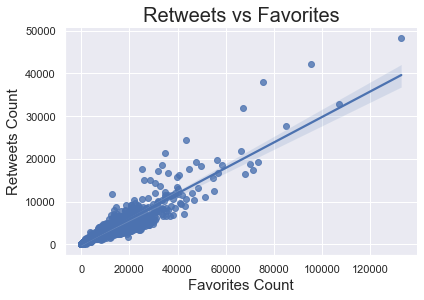

In [521]:
# Plot a scatter plot showing the relationship between retweet_count and favorite_count.
sns.set(font_scale=1.0)
sns.lmplot(y='retweet_count', x='favorite_count', data= twitter_archive_master, height=4, aspect=1.5)

plt.title('Retweets vs Favorites',fontsize = 20)
plt.xlabel('Favorites Count',fontsize = 15)
plt.ylabel('Retweets Count',fontsize = 15);